# Sentiment Analysis using TextBlob

In [30]:
import pandas as pd
import csv
import nltk
from nltk.corpus import stopwords
review = pd.read_csv("Musical_instruments_reviews.csv")
df = pd.DataFrame(review, columns=['reviewText'])
df['finaltext'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
df.drop('reviewText', axis=1, inplace=True)

print(df)

                                               finaltext
0      Not much write here, exactly supposed to. filt...
1      The product exactly quite affordable.I realize...
2      The primary job device block breath would othe...
3      Nice windscreen protects MXL mic prevents pops...
4      This pop filter great. It looks performs like ...
...                                                  ...
10249                        Great, expected. Thank all.
10250  I've thinking trying Nanoweb strings while, I ...
10251  I tried coated strings past ( including Elixir...
10252  Well, MADE Elixir DEVELOPED Taylor Guitars ......
10253  These strings really quite good, I call perfec...

[10254 rows x 1 columns]


In [31]:
import textblob
from textblob import TextBlob

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['finaltext'].apply(polarity) #calculate polarity
df['subjectivity'] = df['finaltext'].apply(subjectivity) #calculate subjectivity

print (df)

                                               finaltext  polarity  \
0      Not much write here, exactly supposed to. filt...  0.250000   
1      The product exactly quite affordable.I realize...  0.052778   
2      The primary job device block breath would othe...  0.167500   
3      Nice windscreen protects MXL mic prevents pops...  0.250000   
4      This pop filter great. It looks performs like ...  0.800000   
...                                                  ...       ...   
10249                        Great, expected. Thank all.  0.350000   
10250  I've thinking trying Nanoweb strings while, I ...  0.185908   
10251  I tried coated strings past ( including Elixir...  0.316484   
10252  Well, MADE Elixir DEVELOPED Taylor Guitars ......  0.162662   
10253  These strings really quite good, I call perfec...  0.346429   

       subjectivity  
0          0.441667  
1          0.394444  
2          0.434286  
3          0.906250  
4          0.750000  
...             ...  
10249

In [32]:
df.loc[df['polarity'] > 0.1,'analysis'] = 'positive'
df.loc[(df['polarity'] >= -0.1, 'analysis') and (df['polarity'] <= 0.1, 'analysis')] = 'neutral'
df.loc[df['polarity'] <-0.1, 'analysis'] = 'negative'

# assigning sentiment based on value
print(df)

                                               finaltext  polarity  \
0      Not much write here, exactly supposed to. filt...  0.250000   
1      The product exactly quite affordable.I realize...  0.052778   
2      The primary job device block breath would othe...  0.167500   
3      Nice windscreen protects MXL mic prevents pops...  0.250000   
4      This pop filter great. It looks performs like ...  0.800000   
...                                                  ...       ...   
10249                        Great, expected. Thank all.  0.350000   
10250  I've thinking trying Nanoweb strings while, I ...  0.185908   
10251  I tried coated strings past ( including Elixir...  0.316484   
10252  Well, MADE Elixir DEVELOPED Taylor Guitars ......  0.162662   
10253  These strings really quite good, I call perfec...  0.346429   

       subjectivity  analysis  
0          0.441667  positive  
1          0.394444   neutral  
2          0.434286  positive  
3          0.906250  positive  

In [33]:
df.loc[(df['subjectivity'] > 0.6,'analysis_1')] = 'objective'
df.loc[(df['subjectivity'] >= 0.4, 'analysis_1') and (df['subjectivity'] <= 0.6, 'analysis_1')] = 'neutral'
df.loc[df['subjectivity'] < 0.4, 'analysis_1'] = 'subjective'

# assigning sentiment based on value
print(df)

                                               finaltext  polarity  \
0      Not much write here, exactly supposed to. filt...  0.250000   
1      The product exactly quite affordable.I realize...  0.052778   
2      The primary job device block breath would othe...  0.167500   
3      Nice windscreen protects MXL mic prevents pops...  0.250000   
4      This pop filter great. It looks performs like ...  0.800000   
...                                                  ...       ...   
10249                        Great, expected. Thank all.  0.350000   
10250  I've thinking trying Nanoweb strings while, I ...  0.185908   
10251  I tried coated strings past ( including Elixir...  0.316484   
10252  Well, MADE Elixir DEVELOPED Taylor Guitars ......  0.162662   
10253  These strings really quite good, I call perfec...  0.346429   

       subjectivity  analysis  analysis_1  
0          0.441667  positive     neutral  
1          0.394444   neutral  subjective  
2          0.434286  positi

In [34]:
df['analysis'].value_counts()

positive    8242
neutral     1701
negative     311
Name: analysis, dtype: int64

In [35]:
df['analysis_1'].value_counts()

neutral       5801
objective     2994
subjective    1459
Name: analysis_1, dtype: int64

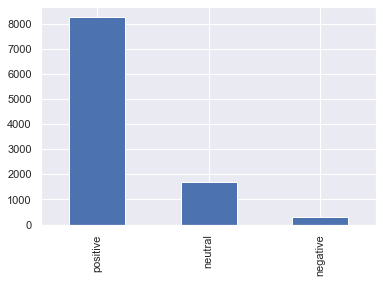

In [45]:
import matplotlib.pyplot as plt
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

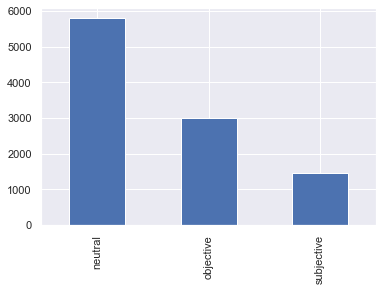

In [46]:
import matplotlib.pyplot as plt
df['analysis_1'].value_counts().plot(kind = 'bar')
plt.show()

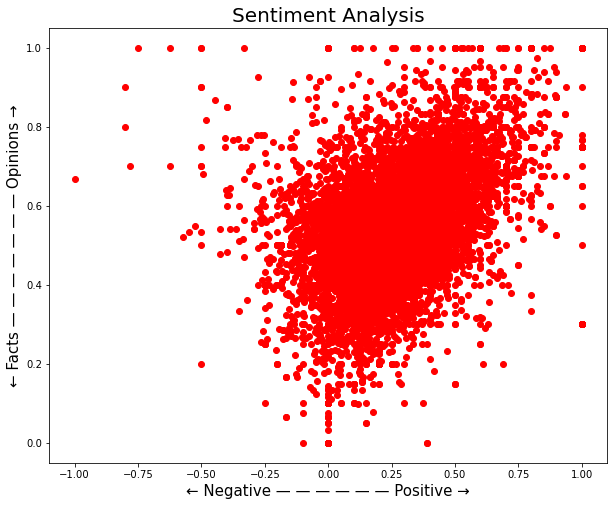

In [29]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
for index, Message in enumerate(df.index):
    x = df.polarity.loc[Message]
    y = df.subjectivity.loc[Message]
    plt.scatter(x, y, color = 'Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS

data = df[['finaltext','analysis']]
train, test = train_test_split(data,test_size = 0.1)
train = train[train.analysis != "Neutral"]


Positive words


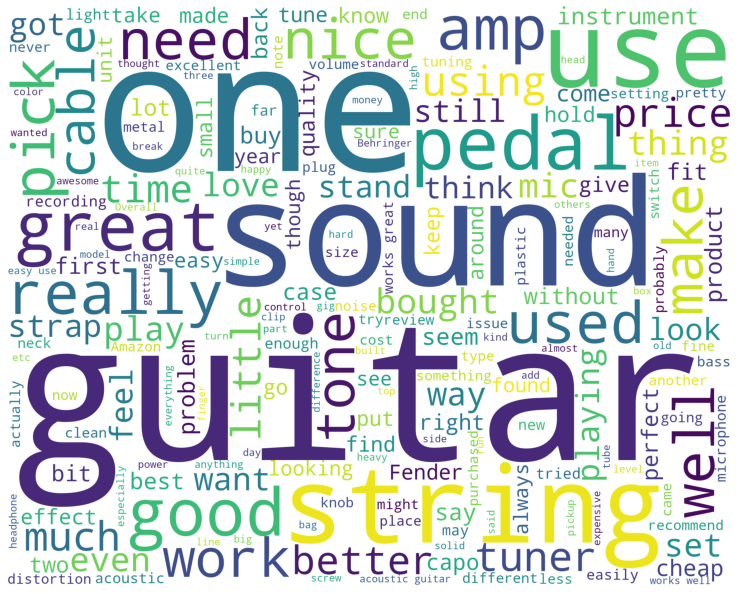

Negative words


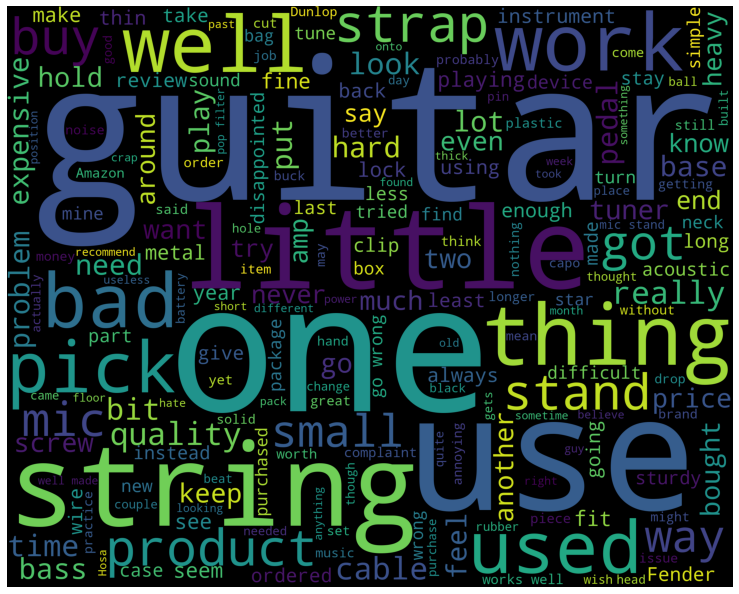

In [47]:
train_pos = train[ train['analysis'] == 'positive']
train_pos = train_pos['finaltext']
train_neg = train[ train['analysis'] == 'negative']
train_neg = train_neg['finaltext']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)